In [1]:
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import texthero as hero
from texthero import preprocessing
sb.set() # set the default Seaborn style for graphics
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.dates as mdates

In [2]:
steamData = pd.read_csv('steam_data/steam.csv')

In [3]:
#rename for easier identification
steamData = steamData.rename(columns={"name": "title"})

#create a custom cleaning pipeline
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace]

steamData['title'] = hero.clean(steamData['title'], pipeline = custom_pipeline)
steamData.sample(n=60)

,appid,title,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
1629,230150,incredipede,2013-03-18,1,Colin Northway with art by Thomas Shahan,Northway Games,windows;mac,0,Single-player,Adventure;Indie;Simulation,Indie;Adventure;Puzzle,6,228,93,0,0,100000-200000,6.99
9533,489810,blockaid,2016-07-26,1,SEGA Hardlight™,SEGA,windows;mac,0,Single-player,Casual;Indie;Strategy,Casual;Strategy;Indie,0,4,1,0,0,0-20000,9.99
9257,477130,surge,2016-05-24,1,House of Secrets,House of Secrets,windows,0,Single-player,Indie,Indie;VR;Music,0,217,11,3,3,50000-100000,0.00
16684,694980,fjong,2017-09-11,1,VaragtP,VaragtP,windows,0,Single-player;Steam Achievements;Steam Cloud,Casual;Indie,Indie;Casual;Adventure,44,52,22,0,0,0-20000,1.69
10756,521790,ancient frontier,2017-09-21,1,"Fair Weather Studios, LLC","Fair Weather Studios, LLC",windows,0,Single-player;Steam Achievements;Steam Trading...,Strategy,Strategy;Turn-Based Strategy;Sci-fi,87,62,21,0,0,0-20000,18.99
24123,918990,gladio,2018-09-20,1,4188,4188,windows,0,Single-player,Action;Indie,Gore;Violent;Action,0,23,5,0,0,0-20000,2.09
14709,639240,codered agent sarah s story day one,2017-12-12,1,LivinThing Studio,LivinThing Studio,windows,0,Single-player;Steam Achievements;Steam Cloud;S...,Adventure;Indie;Early Access,Early Access;Indie;Nudity,17,6,2,0,0,0-20000,7.19
18781,756210,talsaluq tower of infinity,2017-12-15,1,Legion Ivory,Black Water,windows,0,Single-player,Adventure;Casual;Indie,Adventure;Indie;Casual,0,3,0,0,0,0-20000,0.79
22176,856240,total singu,2018-06-13,1,xRANDBOx,xRANDBOx,windows,0,Single-player,Indie,Indie,0,4,1,0,0,0-20000,2.09
1710,235520,the white laboratory,2019-03-28,1,Laboratory Systems,Laboratory Systems;Gamera Game,windows,0,Single-player;Steam Achievements;Steam Cloud,Indie;Strategy,Indie;Strategy;Tower Defense,15,120,34,0,0,0-20000,7.19


In [4]:
tags = pd.DataFrame(steamData[['title','categories']])
tags

,title,categories
0,counter strike,Multi-player;Online Multi-Player;Local Multi-P...
1,team fortress classic,Multi-player;Online Multi-Player;Local Multi-P...
2,day of defeat,Multi-player;Valve Anti-Cheat enabled
3,deathmatch classic,Multi-player;Online Multi-Player;Local Multi-P...
4,half life opposing force,Single-player;Multi-player;Valve Anti-Cheat en...
...,...,...
27070,room of pandora,Single-player;Steam Achievements
27071,cyber gun,Single-player
27072,super star blast,Single-player;Multi-player;Co-op;Shared/Split ...
27073,new yankee 7 deer hunters,Single-player;Steam Cloud


In [11]:
steamUniqueTitle = pd.read_excel("output.xlsx", sheet_name = 'Sheet1', header = 0)
steamUniqueTitle

,Unnamed: 0,title,genre,release_date
0,0,playerunknown s battlegrounds,"Action,Adventure,Massively Multiplayer","Dec 21, 2017"
1,1,battletech,"Action,Adventure,Strategy","Apr 24, 2018"
2,2,dayz,"Action,Adventure,Massively Multiplayer","Dec 13, 2018"
3,3,human fall flat,"Adventure,Indie","Jul 22, 2016"
4,4,they are billions,"Strategy,Early Access","Dec 12, 2017"
...,...,...,...,...
136,137,transport fever 2,"Simulation,Strategy",Q4 2019
137,138,halo the master chief collection,Action,Coming Soon
138,139,fall guys ultimate knockout,"Casual,Indie,Massively Multiplayer,Sports",2020
139,140,mount blade ii bannerlord,"Action,RPG,Simulation,Strategy",To Be Announced


In [111]:
match_title = tags.title.isin(steamUniqueTitle.title)
games = tags[match_title]
games

,title,categories
0,counter strike,Multi-player;Online Multi-Player;Local Multi-P...
10,counter strike source,Multi-player;Cross-Platform Multiplayer;Steam ...
21,left 4 dead 2,Single-player;Multi-player;Co-op;Steam Achieve...
23,portal 2,Single-player;Co-op;Steam Achievements;Full co...
116,sid meier s civilization(r) iii complete,Single-player;Multi-player;Includes level editor
...,...,...
21463,atlas,Online Multi-Player;MMO;Co-op;Online Co-op;Ste...
22458,hitman(tm) 2,Single-player;Online Multi-Player;Online Co-op...
22770,football manager 2019,Single-player;Multi-player;Steam Achievements;...
24798,among us,Multi-player;Online Multi-Player;Local Multi-P...


In [112]:
multi = games[games['categories'].str.contains('Multi-player', regex = False)]
multi.set_index('title', inplace = True)
multi

,categories
title,
counter strike,Multi-player;Online Multi-Player;Local Multi-P...
counter strike source,Multi-player;Cross-Platform Multiplayer;Steam ...
left 4 dead 2,Single-player;Multi-player;Co-op;Steam Achieve...
sid meier s civilization(r) iii complete,Single-player;Multi-player;Includes level editor
garry s mod,Single-player;Multi-player;Co-op;Cross-Platfor...
...,...
dragon ball fighterz,Single-player;Multi-player;Online Multi-Player...
beasts of bermuda,Multi-player;Online Multi-Player
farming simulator 19,Single-player;Multi-player;Co-op;Cross-Platfor...


In [113]:
single = games[games['categories'].str.contains('Single-player', regex = False)]
single.set_index('title', inplace = True)
single

,categories
title,
left 4 dead 2,Single-player;Multi-player;Co-op;Steam Achieve...
portal 2,Single-player;Co-op;Steam Achievements;Full co...
sid meier s civilization(r) iii complete,Single-player;Multi-player;Includes level editor
garry s mod,Single-player;Multi-player;Co-op;Cross-Platfor...
star wars(tm) empire at war gold pack,Single-player;Multi-player;Online Multi-Player...
...,...
sekiro(tm) shadows die twice,Single-player;Steam Achievements;Full controll...
green hell,Single-player
hitman(tm) 2,Single-player;Online Multi-Player;Online Co-op...


In [116]:
data = [['Singleplayer Games', len(single)], ['Multiplayer Games', len(multi)]]
gamesGraph = pd.DataFrame(data, columns = ['Type of Game', 'Count'])
gamesGraph

,Type of Game,Count
0,Singleplayer Games,107
1,Multiplayer Games,70


<AxesSubplot:xlabel='Type of Game', ylabel='Count'>

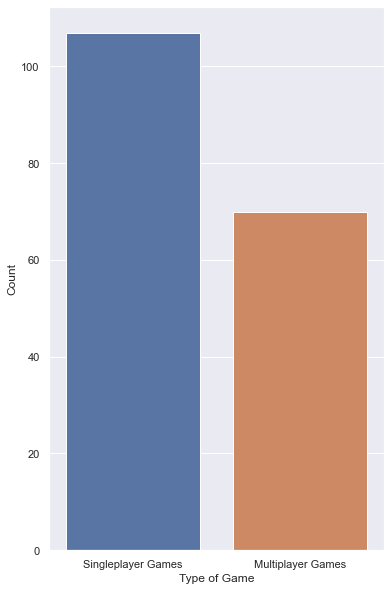

In [120]:
f, axes = plt.subplots(figsize = [6,10])
sb.barplot(x = 'Type of Game', y = 'Count', data = gamesGraph)

From our results, more people are willing to try out different Singleplayer Games as compared to Multiplayer Games as there are more Unique Singleplayer Games being played. Hence, creating a Singleplayer game will increase the chances of it being played.